In [ ]:
#LIBRARIES
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
#LOAD DATASET
df = pd.read_csv("churning_customers.csv")
#f

Data visualizations (churn in relation to the features)

/var/folders/02/7c0n4r_14_n7t4svgrzcxjc40000gn/T/ipykernel_47773/2995623060.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['tenure_div', 'Churn']).size().unstack().plot(kind='bar')


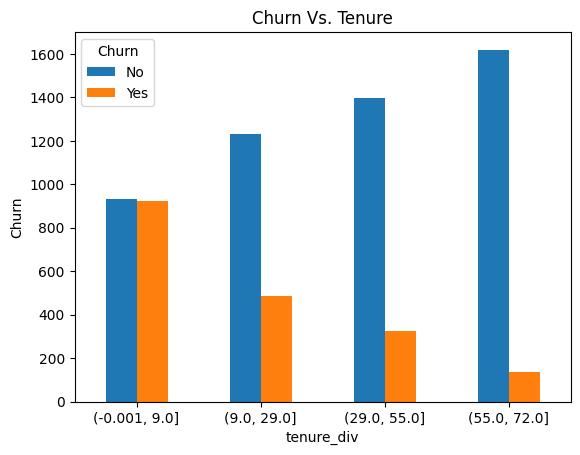

In [4]:
df['tenure_div'] = pd.qcut(df['tenure'], q=4)  # 4 quantiles
df.groupby(['tenure_div', 'Churn']).size().unstack().plot(kind='bar')
plt.title('Churn Vs. Tenure')
plt.ylabel('Churn')
plt.xticks(rotation=0)
plt.show()

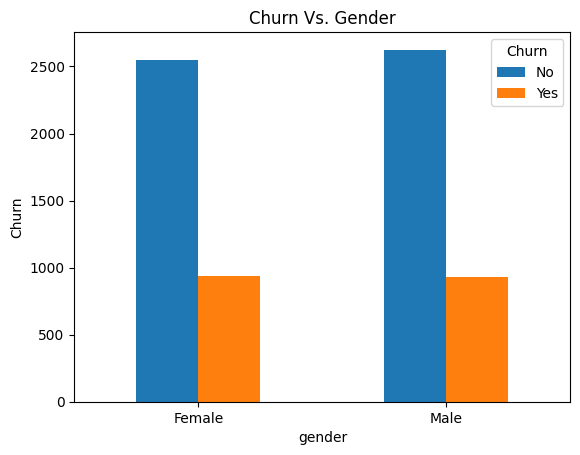

In [5]:
df.groupby(['gender', 'Churn']).size().unstack().plot(kind='bar')
plt.title('Churn Vs. Gender')
plt.ylabel('Churn')
plt.xticks(rotation=0)
plt.show()

Use the Multinomonial Logistic Regression Model

Logistic Regression model accuracy: 78.04%
Precision = 62.45%
Recall = 43.58%%
Confusion Matrix =  [[935  98]
 [211 163]]


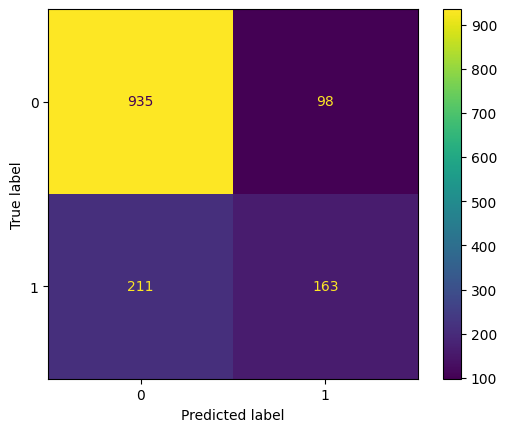

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

# define the features and the target
X = np.asarray(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# turned the target to int as is required for the model 
y = np.asarray(df['Churn'].map({'Yes': 1, 'No': 0}).values)


# train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

Use Logistic Regression

Logistic Regression model accuracy: 78.04%
Precision = 62.45%
Recall = 43.58%%
Confusion Matrix =  [[935  98]
 [211 163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



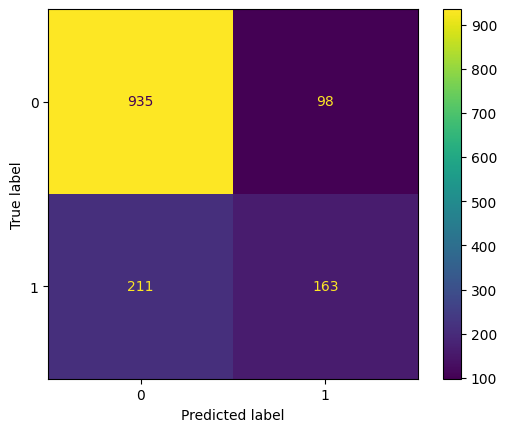

In [14]:
reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {accuracy_score(y_test, reg_pred) * 100:.2f}%")

# Precision
Precision = metrics.precision_score(y_test, reg_pred)
print(f"Precision = {Precision * 100:.2f}%")

#Recall
recall = metrics.recall_score(y_test, reg_pred)
print(f"Recall = {recall * 100:.2f}%%")

# Confusion matrix
cm = confusion_matrix(y_test, reg_pred)
print(f"Confusion Matrix = ", cm)

print("Classification Report:\n", classification_report(y_test, reg_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

Use Random Forest

Logistic Regression model accuracy = 75.84%
Precision = 55.86%
Recall = 43.32%%
Confusion Matrix =  [[905 128]
 [212 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



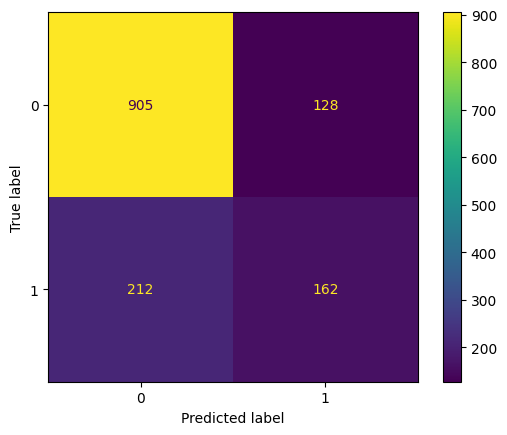

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training
randfor = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
randfor.fit(X_train, y_train)
forest_pred = randfor.predict(X_test)

# Accuracy
print(f"Random Forest model accuracy = {accuracy_score(y_test, forest_pred) * 100:.2f}%")

# Precision
Precision = metrics.precision_score(y_test, forest_pred)
print(f"Precision = {Precision * 100:.2f}%")

#Recall
recall = metrics.recall_score(y_test, forest_pred)
print(f"Recall = {recall * 100:.2f}%%")

# Confusion matrix
cm = confusion_matrix(y_test, forest_pred)
print(f"Confusion Matrix = ", cm)

print("Classification Report:\n", classification_report(y_test, forest_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()


Imprivng Accuracy Using XGBoost

XGBoost model accuracy: 78.89%
Precision = 64.31%
Recall = 46.26%%
Confusion Matrix =  [[937  96]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



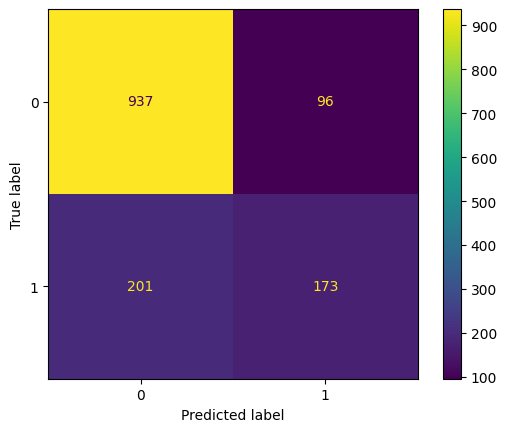

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [13]:
import xgboost as xgb

# Training the classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
xgb_classifier.fit(X_train, y_train)

# Testing

xgb_predict = xgb_classifier.predict(X_test)

print(f"XGBoost model accuracy: {accuracy_score(y_test, xgb_predict) * 100:.2f}%")

# Precision
Precision = metrics.precision_score(y_test, xgb_predict)
print(f"Precision = {Precision * 100:.2f}%")

#Recall
recall = metrics.recall_score(y_test, xgb_predict)
print(f"Recall = {recall * 100:.2f}%%")

# Confusion matrix
cm = confusion_matrix(y_test, xgb_predict)
print(f"Confusion Matrix = ", cm)

print("Classification Report:\n", classification_report(y_test, xgb_predict))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

print("Classification Report:\n", classification_report(y_test, xgb_predict))